## Object detection

Tracking (following something over time) typically starts with object detection (localizing the thing in a given image)

Background subtraction

What is “background”?

Thresholding for binarized images

Connected component labeling

![sensors-15-19369-g001.png](sensors-15-19369-g001.png)
Image: [Chao..Perán *Sensors* 2015](https://www.mdpi.com/1424-8220/15/8/19369)

## Connected component labeling

https://en.wikipedia.org/wiki/Connected-component_labeling

![248px-Two-pass_connected_component_labeling.svg.png](248px-Two-pass_connected_component_labeling.svg.png)
Image: https://commons.wikimedia.org/wiki/File:Two-pass_connected_component_labeling.svg

# Blur and erosion

## Operations to help thresholding

Before thresholding: Gaussian blur

![image25.png](image25.png)
Image: Ronneberger..Joffe Chromosome Research 2008

Note that this is an example of [kernel based image processing](https://en.wikipedia.org/wiki/Kernel_(image_processing)). This is also called "convolution".

![image23.png](image23.png)
Image: https://de.m.wikipedia.org/wiki/Datei:Halftone,_Gaussian_Blur.jpg

After thresholding: Erosion, dilation

See [wikipedia on Erosion](https://en.wikipedia.org/wiki/Erosion_(morphology)). Note the similarities to the kernel operations.

![image24.png](image24.png)
Image: Cereser, PhD thesis 2016

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import imageio

In [2]:
# Here we define a helper function which we call below to make sure
# an image is an "unsigned 8 bit integer". This way, we know they
# take only a single byte per pixel and have a value from 0..255.

def ensure_dtype_uint8(arr):
    return arr.astype(np.uint8)

In [3]:
fname = 'short-movie20170810_182130.mp4'
reader = imageio.get_reader(fname)
for frame in reader:
    frame0 = frame[:,:,1] # take only green channel
    break

In [4]:
frame0.ndim

2

In [5]:
frame0.shape

(1024, 1280)

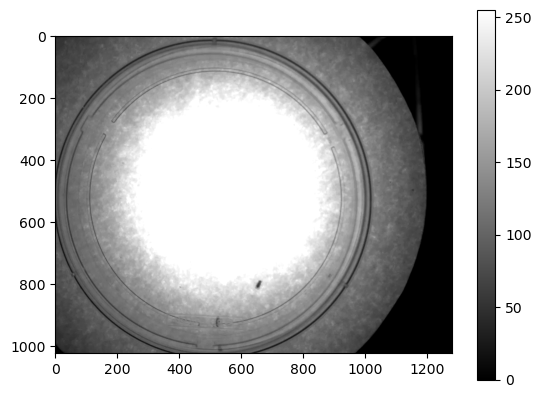

In [6]:
plt.imshow(frame0,cmap='gray')
plt.colorbar();

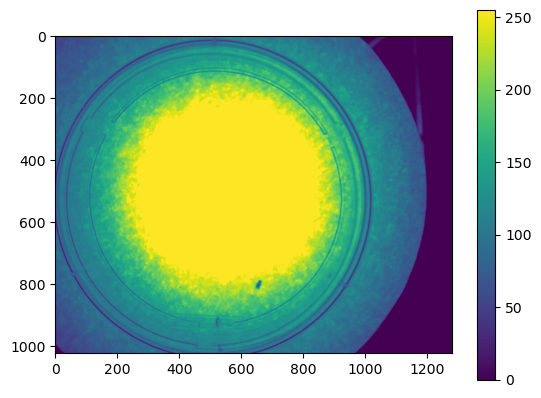

In [7]:
plt.imshow(frame0)
plt.colorbar();

In [8]:
# get all frames into big 3D array
(height,width) = frame0.shape
all_frames = []
reader.set_image_index(0) # return to start of file
for frame in reader:
    all_frames.append( frame[:,:,1] )
all_frames = np.array(all_frames)
print(all_frames.shape)
n_frames = len(all_frames)

(102, 1024, 1280)


In [9]:
mean_frame = np.mean(all_frames, axis=0)
median_frame = np.median(all_frames, axis=0)

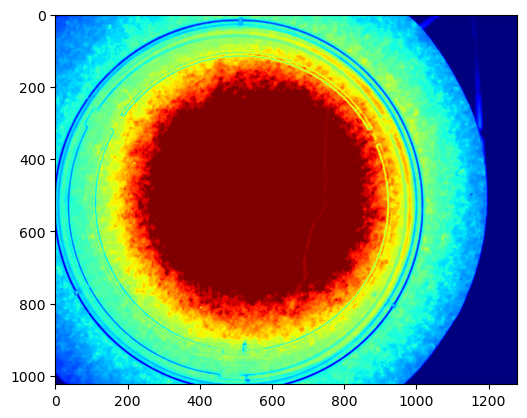

In [10]:
plt.imshow(mean_frame, cmap="jet");

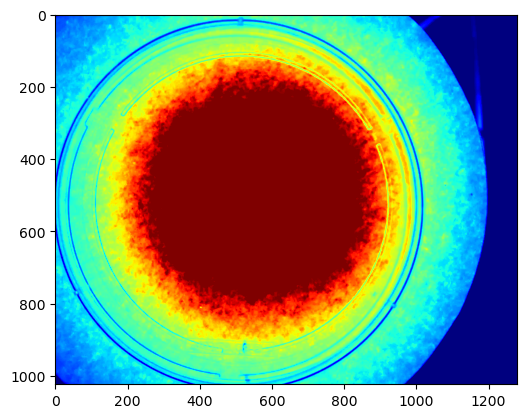

In [11]:
plt.imshow(median_frame, cmap="jet");

In [12]:
start_row, stop_row = (750,950)
start_col, stop_col = (400,800)

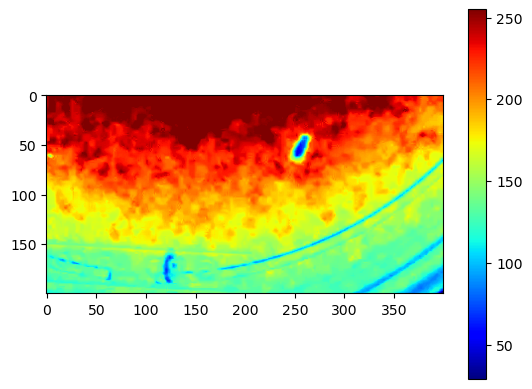

In [13]:
frame = all_frames[0,:,:]

plt.imshow(frame[start_row:stop_row,start_col:stop_col], cmap='jet')
plt.colorbar();

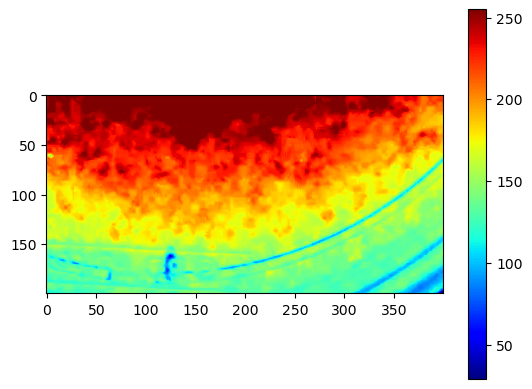

In [14]:
plt.imshow(median_frame[start_row:stop_row,start_col:stop_col], cmap='jet')
plt.colorbar();

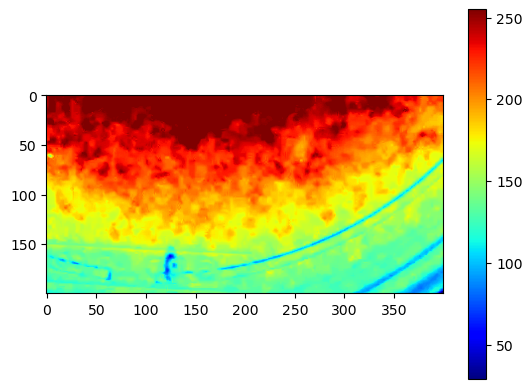

In [15]:
plt.imshow(mean_frame[start_row:stop_row,start_col:stop_col], cmap='jet')
plt.colorbar();

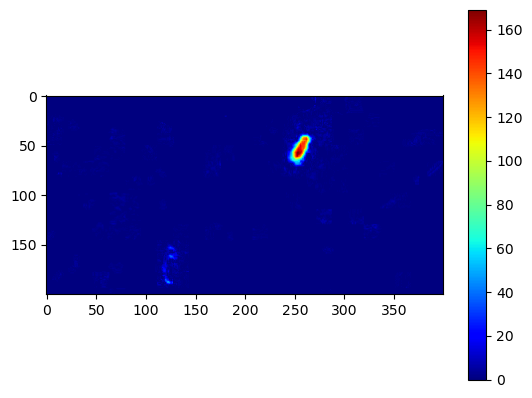

In [16]:
frame_absdiff = abs(frame - median_frame)

plt.imshow(frame_absdiff[start_row:stop_row,start_col:stop_col], cmap='jet')
plt.colorbar();

In [17]:
threshold = 70

In [18]:
tmp = frame_absdiff>threshold
print(tmp.dtype)
ensure_dtype_uint8(frame_absdiff>threshold).dtype

bool


dtype('uint8')

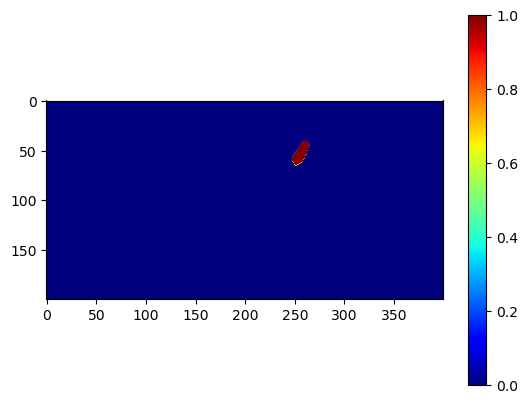

In [19]:
binarized = ensure_dtype_uint8(frame_absdiff>threshold)
plt.imshow(binarized[start_row:stop_row,start_col:stop_col], cmap='jet')
plt.colorbar();

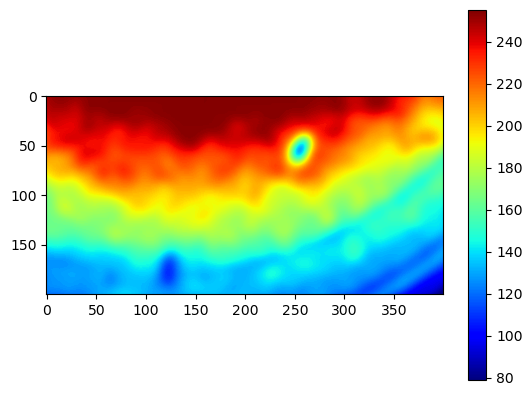

In [20]:
blurred = ndimage.gaussian_filter(frame, sigma=6.0)
plt.imshow(blurred[start_row:stop_row,start_col:stop_col], cmap='jet')
plt.colorbar();

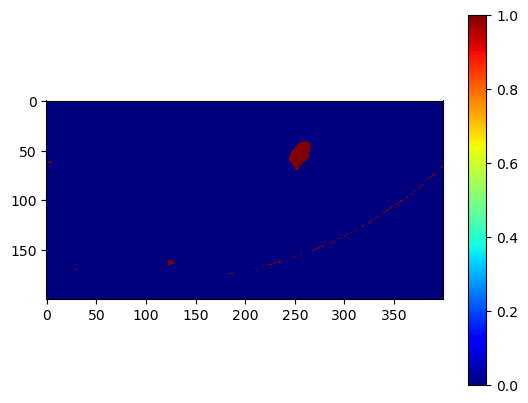

In [21]:
blurred_absdiff = abs(blurred - median_frame)
blur_threshold = 40
binarized_blurred = ensure_dtype_uint8(blurred_absdiff>blur_threshold)
plt.imshow(binarized_blurred[start_row:stop_row,start_col:stop_col], cmap='jet', interpolation='nearest')
plt.colorbar();

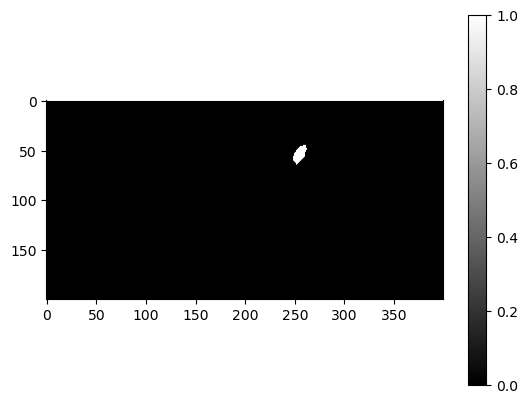

In [22]:
eroded = binarized_blurred
for i in range(4):
    eroded = ndimage.binary_erosion(eroded)
plt.imshow(eroded.astype(np.uint8)[start_row:stop_row,start_col:stop_col], cmap='gray')
plt.colorbar();